<a href="https://colab.research.google.com/github/bruno353/Machine-Learning/blob/main/Images_Predict_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [10]:
#analisar imagens com CNN, usando um dataset do tensorflow
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [11]:
X_train.shape

(50000, 32, 32, 3)

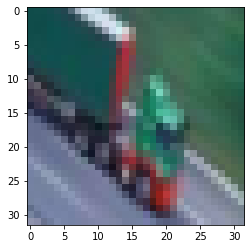

In [12]:
plt.imshow(X_train[50])

In [13]:
y_train[50]

array([9], dtype=uint8)

In [14]:
#criando uma escala para nromalizar os valores entre 0 e 1
X_train = X_train/255
X_test = X_test/255

In [15]:
#usando Convolutional Neural Network(CNN)
#o último activatiob lyaer vamos usar um softmax para normalizar o output eentre 0 e 1
#no cnn voce tem que especificar quantos filtros voce quer, o input_shape, kernel_size e activation function
#no maxpooling2d geralmente se passa um 2,2
#no cnn, voce pode por quantos layers voce quer, é tentativa e erro, bou passar 2 layers.
cnn = models.Sequential([
    #AQUI É CNN:
    layers.Conv2D(filters=25, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=50, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    #AQUI É DENSE: 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=10)
cnn.evaluate(X_test,y_test)

Epoch 1/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.4876 - accuracy: 0.4653
Epoch 2/10
1563/1563 [==============================] - 54s 34ms/step - loss: 1.1501 - accuracy: 0.5965
Epoch 3/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.0282 - accuracy: 0.6414
Epoch 4/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.9545 - accuracy: 0.6691
Epoch 5/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.8936 - accuracy: 0.6908
Epoch 6/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.8404 - accuracy: 0.7100
Epoch 7/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.7983 - accuracy: 0.7218
Epoch 8/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.7580 - accuracy: 0.7387
Epoch 9/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.7230 - accuracy: 0.7506
Epoch 10/10
313/313 [==============================] - 4s 11ms/s

[0.9213283061981201, 0.6960999965667725]

In [ ]:
#com 10 epochs, tivemos uma acurácia de 76%